# 07 - Regularizações

Nessa aula, iremos tratar dos seguintes conteúdos:
- Função de Custo e Regularização;
- Ridge;
- Lasso;
- Elastic-Net.

###  

##  Regularizações

<br>

As __regularizações__ vão ser uma importante ferramenta para auxiliar no ajuste de modelos de Regressão Linear. Quando modela-se uma Regressão Linear Múltipla, o objetivo é calcular os coeficientes que determinam a equação abaixo:

<br>

$$\ Y_j=\beta_0 + \sum_{i=1}^{n} \beta_i X_{ij} = \beta_0 + \beta X $$

<br>

Para se determinar os valores de todos os parâmetros $\beta$, o processo de modelagem envolve achar os parâmetros que minimizam a chamada __função de custo__, função esta que avalia o custo (ou seja o erro empregado) ao estimar o valor de $Y$, que para o caso das regressões a função de custo é dada pela __soma residual dos quadrados__, conforme a seguir:

<br>

$$
\Theta = \sum_{i = 1}^{n}[y_i - (\beta_0 + \beta X)]^2
$$

<br>

Mas durante o processo iterativo para o cálculo dos parâmetros, um problema que pode surgir é o caso do _overfitting_, como discutido em tópicos anterior. Ao invés do modelo aprender a __generalizar os resultados__, ele apenas passa a __memorizar__ as respostas dos dados fornecidos no treinamento, prejudicando assim o real poder de predição da Regressão Linear e qualquer outro modelo de _Machine Learning_.

A forma utilizada para diminuir esse efeito nas regressões, seria justamente a __regularização__, onde de acordo com o tipo de regularização será adicionado a função de custo um termo conhecido como __penalização__ proporporcional aos coeficientes $\beta$. Dessa forma, ao minimizar a função de custo, também será minimizado os parâmetros $\beta$.

Nos tópicos a seguir, serão apresentados os principais métodos de regularização para as regressões, sendo eles o __Ridge__, __Lasso__ e __Elastic-Net__.

<br><br>

###  Ridge (L2)

<br>

O método Ridge ou penalização L2, consiste em adicionar um termo quadrático dos parâmetros na função de custo:

<br>

$$
\Theta_{Ridge} = \sum_{i = 1}^{n}[y_i - (\beta_0 + \beta X)]^2 + \alpha\sum_{j = 1}^{p}\beta^{2}_{j} 
$$

<br>

Esse tipo de regularização é mais interessante de se usar quando __todas as variáveis atributos dos dados são importantes__, mas esperasse que o modelo generalize mais. O parâmetro $\alpha$ é justamente o que define a complexidade do modelo, quanto maior o $\alpha$, mais simples o modelo, ou seja, menor a viriância e maiores chances de ocorrer um _underfitting_.

O processo de treinamento e geração de novas predições funciona de forma análoga ao que acontece para a função `LinearRegression`, no caso para implementar o [_Ridge_](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) basta carregar a função específica para ele:

<br>

```python
# Carregando a função para o Ridge
from sklearn.linear_model import Ridge

# Instanciar o modelo
model = Ridge(alpha = 1.0) # Parâmetro de Ajuste do Ridge
```

<br><br>

###  Lasso (L1)

<br>

O método Lasso ou penalização L1, consiste em adicionar o módulo dos parâmetros na função de custo, ao invés do quadrado no Ridge:

$$
\Theta_{Lasso} = \sum_{i = 1}^{n}[y_i - (\beta_0 + \beta X)]^2 + \alpha\sum_{j = 1}^{p}|\beta_{j}|
$$

O Lasso tem uma aplicação adicional bem interessante pois, no processo interativo de minimizar a função de custo, alguns parâmetros $\beta$ serão __zerados__. Ou seja, o método pode ser utilizado como __uma seleção de atributos__, onde serão zerados os atributos menos relevantes para a modelagem. No caso do Lasso, se tivermos $\alpha = 0$ cai-se no caso clássico de regressão linear e para os casos $\alpha > 0$, quanto maior o valor de lambda, mais parâmetros serão zerados. 

De forma análoga ao que acontece no _Ridge_, no caso para implementar o [__Lasso__](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html?highlight=lasso#sklearn.linear_model.Lasso) basta carregar a função específica para ele:

<br>

```python
# Carregando a função para o Lasso
from sklearn.linear_model import Lasso

# Instanciar o modelo
model = Lasso(alpha = 1.0) # Parâmetro de Ajuste do Lasso
```

<br><br>

###  Elastic-Net (L1 + L2)

<br>

O __Elastic-Net__ é um caso particular bem interessante pois ele combina ambos os efeitos de penalização L1 e L2, conforme descrito pela fórmula a seguir:

<br>

$$
\Theta_{EN} = \sum_{i = 1}^{n}[y_i - (\beta_0 + \beta X)]^2 + \alpha_{1}\sum_{j = 1}^{p}|\beta_{j}| + \alpha_{2}\sum_{j = 1}^{p}\beta_{j}^{2}
$$

<br>

Ou seja, o _Elastic-Net_ é interessante pois combina o poder de penalização efetiva do _Ridge_ com as características de seleção de atributos do _Lasso_. Para implementar o [_Elastic-Net_](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) basta carregar a sua função específica:

<br>

```python
# Carregando a função para o ElasticNet
from sklearn.linear_model import ElasticNet

# Instanciar o modelo
model = ElasticNet(alpha = 1.0) # Parâmetro de Ajuste do ElasticNet
```

<br><br>

## 

__Exemplo:__ Vamos retomar o exercício com o _dataset_ `Car_Prices.csv` e avaliar os dados com diferentes modelos agora:

In [1]:
# Import das Libs necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
#Carregando o CSV
cars = pd.read_csv('Car_Prices.csv', index_col = 0)

# Mostrar os primeiras linhas
cars.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,88.6,168.8,64.1,48.8,...,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,88.6,168.8,64.1,48.8,...,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,94.5,171.2,65.5,52.4,...,six,152,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,99.8,176.6,66.2,54.3,...,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,99.4,176.6,66.4,54.3,...,five,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# aplicar o get_dummies
cars_dummies = pd.get_dummies(cars,
                              prefix_sep = '_',
                              columns = ['fueltype', 
                                         'aspiration', 
                                         'doornumber', 
                                         'carbody', 
                                         'cylindernumber'],
                              drop_first = True)

In [4]:
# Olhando a transformação
cars_dummies.head()

,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,1,0,0,0,0
2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,1,0,0,0,0
3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,1,0,0,0,0,1,0,0,0
4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,1,0,0,1,0,0,0,0
5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,1,0,1,0,0,0,0,0


In [5]:
# Separando em X e y
X = cars_dummies.drop(['CarName', 'price'], axis = 1)
y = cars_dummies['price']

In [6]:
# Separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [8]:
# Instanciar a normalização
scaler = StandardScaler()

# Fit e Transform do Scaler
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

### Regressão Linear

In [9]:
# Instancia o modelo
linreg = LinearRegression()

In [10]:
# Fit dos dados (ou seja, vamos passar os dados para o modelo aprender com eles)
linreg.fit(X_train_std, y_train)

LinearRegression()

In [12]:
# Para os dados novos, vamos definir a predição para a base de teste
y_pred_lr = linreg.predict(X_test_std)

In [13]:
# feature Importance - LinReg
coefs = linreg.coef_

list_columns = X_train.columns
list_feature = []
list_score = []

for i, v in enumerate(coefs):
    list_feature.append(list_columns[i])
    list_score.append(v)

dictionary = {'Features': list_feature,
              'Scores': list_score}

df_features = pd.DataFrame(dictionary)
df_features = df_features.sort_values(by=['Scores'], ascending=False)
df_features.reset_index(inplace=True, drop=True)
df_features

,Features,Scores
0,enginesize,5.315351e+03
1,compressionratio,2.924531e+03
2,fueltype_gas,2.700265e+03
3,curbweight,1.243329e+03
4,highwaympg,1.047525e+03
5,carwidth,9.818643e+02
6,peakrpm,9.599665e+02
7,aspiration_turbo,8.728895e+02
8,wheelbase,7.618308e+02
9,cylindernumber_two,6.960990e+02


### Ridge

In [14]:
# Instancia o modelo
ridge = Ridge()

In [15]:
# Fit dos dados (ou seja, vamos passar os dados para o modelo aprender com eles)
ridge.fit(X_train_std, y_train)

Ridge()

In [16]:
# Para os dados novos, vamos definir a predição para a base de teste
y_pred_ridge = ridge.predict(X_test_std)

In [17]:
# Feature Importance - Ridge
coefs2 = ridge.coef_

list_columns = X_train.columns
list_feature = []
list_score = []

for i, v in enumerate(coefs2):
    list_feature.append(list_columns[i])
    list_score.append(v)

dictionary2 = {'Features': list_feature,
              'Scores': list_score}

df_features2 = pd.DataFrame(dictionary2)
df_features2 = df_features2.sort_values(by=['Scores'], ascending=False)
df_features2.reset_index(inplace=True, drop=True)
df_features2

,Features,Scores
0,enginesize,4358.903526
1,curbweight,1412.142609
2,compressionratio,1165.949671
3,carwidth,1077.449684
4,fueltype_gas,922.637678
5,peakrpm,914.678189
6,wheelbase,642.395811
7,highwaympg,601.577174
8,aspiration_turbo,589.250228
9,cylindernumber_two,482.123002


## 

### Lasso

In [26]:
# Instancia o modelo
lasso = Lasso(alpha = 5)

In [27]:
# Fit dos dados (ou seja, vamos passar os dados para o modelo aprender com eles)
lasso.fit(X_train_std, y_train)

Lasso(alpha=5)

In [28]:
# Para os dados novos, vamos definir a predição para a base de teste
y_pred_lasso = lasso.predict(X_test_std)

In [29]:
# Feature Importance - Lasso
coefs3 = lasso.coef_

list_columns = X_train.columns
list_feature = []
list_score = []

for i, v in enumerate(coefs3):
    list_feature.append(list_columns[i])
    list_score.append(v)

dictionary3 = {'Features': list_feature,
              'Scores': list_score}

df_features3 = pd.DataFrame(dictionary3)
df_features3 = df_features3.sort_values(by=['Scores'], ascending=False)
df_features3.reset_index(inplace=True, drop=True)
df_features3

,Features,Scores
0,enginesize,5018.971189
1,compressionratio,1814.805480
2,fueltype_gas,1576.132772
3,curbweight,1234.433335
4,carwidth,1056.063431
5,peakrpm,971.719399
6,highwaympg,752.561728
7,aspiration_turbo,727.886137
8,cylindernumber_two,644.306544
9,wheelbase,634.338673


## 

### ElasticNet

In [30]:
# Instancia o modelo
EN = ElasticNet()

In [31]:
# Fit dos dados (ou seja, vamos passar os dados para o modelo aprender com eles)
EN.fit(X_train_std, y_train)

ElasticNet()

In [34]:
# Para os dados novos, vamos definir a predição para a base de teste
y_pred_EN = EN.predict(X_test_std)

In [33]:
# Feature Importance - Elastic-Net
coefs4 = EN.coef_

list_columns = X_train.columns
list_feature = []
list_score = []

for i, v in enumerate(coefs4):
    list_feature.append(list_columns[i])
    list_score.append(v)

dictionary4 = {'Features': list_feature,
              'Scores': list_score}

df_features4 = pd.DataFrame(dictionary4)
df_features4 = df_features4.sort_values(by=['Scores'], ascending=False)
df_features4.reset_index(inplace=True, drop=True)
df_features4

,Features,Scores
0,enginesize,1403.347430
1,carwidth,1013.262644
2,horsepower,997.267325
3,curbweight,961.875360
4,carbody_hardtop,848.036148
5,wheelbase,449.036598
6,carlength,334.534228
7,boreratio,326.374690
8,peakrpm,220.400167
9,doornumber_two,209.115872


Comparando as métricas para avaliar os modelos:

In [35]:
# Comparando os R2s
print('R2 - Regressão Linear: ', np.round(r2_score(y_test, y_pred_lr), 4))
print('R2 - Ridge:            ', np.round(r2_score(y_test, y_pred_ridge), 4))
print('R2 - Lasso:            ', np.round(r2_score(y_test, y_pred_lasso), 4))
print('R2 - Elastic-Net:      ', np.round(r2_score(y_test, y_pred_EN), 4))

R2 - Regressão Linear:  0.7923
R2 - Ridge:             0.7912
R2 - Lasso:             0.7949
R2 - Elastic-Net:       0.7291


In [36]:
# Comparando o MSE
print('MSE - Regressão Linear: ', np.round(mean_squared_error(y_test, y_pred_lr), 4))
print('MSE - Ridge:            ', np.round(mean_squared_error(y_test, y_pred_ridge), 4))
print('MSE - Lasso:            ', np.round(mean_squared_error(y_test, y_pred_lasso), 4))
print('MSE - Elastic-Net:      ', np.round(mean_squared_error(y_test, y_pred_EN), 4))

MSE - Regressão Linear:  14390119.8668
MSE - Ridge:             14466383.1511
MSE - Lasso:             14210201.8536
MSE - Elastic-Net:       18770205.5038


In [37]:
# comparando o MAE
print('MAE - Regressão Linear: ', np.round(mean_absolute_error(y_test, y_pred_lr), 4))
print('MAE - Ridge:            ', np.round(mean_absolute_error(y_test, y_pred_ridge), 4))
print('MAE - Lasso:            ', np.round(mean_absolute_error(y_test, y_pred_lasso), 4))
print('MAE - Elastic-Net:      ', np.round(mean_absolute_error(y_test, y_pred_EN), 4))

MAE - Regressão Linear:  2632.2202
MAE - Ridge:             2638.6542
MAE - Lasso:             2632.6767
MAE - Elastic-Net:       3014.7481


## 

## Exercícios

__1)__ Reavaliar o conjunto de dados para `Insurance.csv` e fazer o comparativo entre os modelos de regularização com a Regressão Linear.

In [38]:
# Carrega os dados
insurance = pd.read_csv('insurance.csv')

# Mostra as primeiras linhas
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [39]:
# Aplica um get dummies para lidar com as variaveis categoricas
ins_dummies = pd.get_dummies(insurance,
                             columns = ['sex',
                                        'smoker',
                                        'region'],
                             drop_first = True)

In [41]:
# Mostra as primeiras linhas
ins_dummies.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [ ]:
# Algumas estatísticas
ins_dummies.describe().T.style.background_gradient(cmap = 'PuBu')

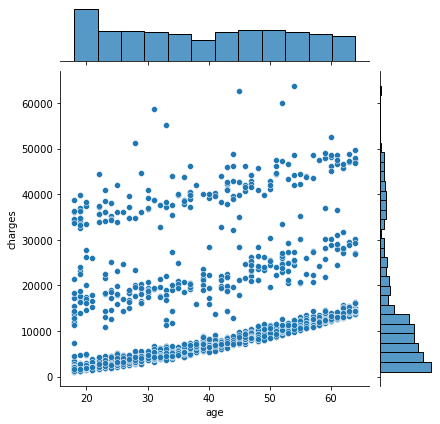

In [44]:
# Gráfico da Idade pelo Charges
sns.jointplot(x = 'age',
              y = 'charges',
              data = ins_dummies)

plt.show()

In [45]:
# Separando em X e y
X = ins_dummies.drop(['charges'], axis = 1)
y = ins_dummies['charges']

In [46]:
# Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [47]:
# instanciar a normalização
scaler = StandardScaler()

# Normalização
X_train_std = scaler.fit_transform(X_train)
X_test_std  = scaler.transform(X_test)

In [51]:
X.columns

Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [52]:
df = pd.DataFrame(X_train_std, columns = ['age', 
                                          'bmi', 
                                          'children', 
                                          'sex_male', 
                                          'smoker_yes', 
                                          'region_northwest',
                                          'region_southeast', 
                                          'region_southwest'])

df.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,1.544465,0.103182,-0.915011,-1.025978,-0.512989,1.757082,-0.593802,-0.557606
1,0.481874,-0.490845,-0.915011,0.974679,-0.512989,-0.569125,-0.593802,1.793381
2,1.048589,0.226660,1.560279,-1.025978,-0.512989,-0.569125,1.684062,-0.557606
3,1.119429,0.023923,-0.915011,0.974679,1.949359,-0.569125,-0.593802,-0.557606
4,-1.005753,2.502650,0.735182,0.974679,1.949359,-0.569125,1.684062,-0.557606


In [53]:
df.describe().T.style.background_gradient(cmap = 'PuBu')

,count,mean,std,min,25%,50%,75%,max
age,936.000000,-0.000000,1.000535,-1.501628,-0.864074,-0.014001,0.906910,1.756983
bmi,936.000000,0.000000,1.000535,-2.433112,-0.721113,-0.055336,0.651113,3.769128
children,936.000000,0.000000,1.000535,-0.915011,-0.915011,-0.089914,0.735182,3.210472
sex_male,936.000000,0.000000,1.000535,-1.025978,-1.025978,0.974679,0.974679,0.974679
smoker_yes,936.000000,-0.000000,1.000535,-0.512989,-0.512989,-0.512989,-0.512989,1.949359
region_northwest,936.000000,-0.000000,1.000535,-0.569125,-0.569125,-0.569125,-0.569125,1.757082
region_southeast,936.000000,-0.000000,1.000535,-0.593802,-0.593802,-0.593802,1.684062,1.684062
region_southwest,936.000000,0.000000,1.000535,-0.557606,-0.557606,-0.557606,-0.557606,1.793381


In [48]:
# Instancia o modelo
linreg = LinearRegression()

In [49]:
# Treinamento do modelo
linreg.fit(X_train_std, y_train)

LinearRegression()

__2)__ Reavaliar o conjunto de dados para `Admission_Predict.csv` e fazer o comparativo entre os modelos de regularização com a Regressão Linear.

__3)__ Reavaliar o conjunto de dados para `usa_housing.csv` e fazer o comparativo entre os modelos de regularização com a Regressão Linear.

__4)__ Utilizando o dataset `penguins` e a partir dos modelos de Regressão e regularização, desenvolva uma regressão para determinar o valor da massa corporal dos pinguins (`body_mass_g`)

In [1]:
import pandas as pd
import seaborn as sns

In [3]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## 